In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

In [2]:
print("There is 194 countries in the dataset where the time dataset donated is 1990")


There is 194 countries in the dataset where the time dataset donated is 1990


In [3]:
# importing data
col_names = [
    'name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes',
    'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles',
    'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate',
    'text', 'topleft', 'botright'
    ]

In [4]:
flag = pd.read_csv("./flag.data", header=None, names=col_names)
flag = flag.replace("?",-99999)
flag = flag.drop(["name","zone","area","population","language"],1)

In [5]:
# data visualization
print(flag.head())
print(flag.info())

# decrisbe 
print("\nDescribe")
flag.describe()

   landmass  religion  bars  stripes  colours  red  green  blue  gold  white  \
0         5         2     0        3        5    1      1     0     1      1   
1         3         6     0        0        3    1      0     0     1      0   
2         4         2     2        0        3    1      1     0     0      1   
3         6         1     0        0        5    1      0     1     1      1   
4         3         0     3        0        3    1      0     1     1      0   

   ...  saltires  quarters sunstars  crescent  triangle  icon  animate  text  \
0  ...         0         0        1         0         0     1        0     0   
1  ...         0         0        1         0         0     0        1     0   
2  ...         0         0        1         1         0     0        0     0   
3  ...         0         0        0         0         1     1        1     0   
4  ...         0         0        0         0         0     0        0     0   

   topleft  botright  
0    black     

,landmass,religion,bars,stripes,colours,red,green,blue,gold,white,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.190722,0.453608,1.551546,3.463918,0.788660,0.469072,0.510309,0.469072,0.752577,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,2.061167,1.038339,2.328005,1.300154,0.409315,0.500334,0.501187,0.500334,0.432631,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,0.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,7.000000,5.000000,14.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
country_flag = flag.groupby('landmass')['religion'].agg(['count'])

country_dic = {1:"N.America", 2:"S.America", 3:"Europe", 4:"Africa", 5:"Asia", 6:"Oceania"}
religion_dic = { 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"}

for i in range(0,7):
    religion_size = []
    for x in range(1,7):
        new_flag = flag[(flag['landmass'] == x) & (flag['religion'] == i)]
        religion_size.append(len(new_flag))
    name = religion_dic[i]
    country_flag[name] = religion_size

    
country_flag.index = country_flag.index.map(country_dic)
country_flag = country_flag.rename(columns={'count':"Total Flags"})
religion_dic = { 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"}
religion_flag =flag["religion"]
religion_flag = religion_flag.map(religion_dic)
religions = religion_flag.value_counts()


Text(0.5, 1.0, 'Distribution of Flags by Religion')

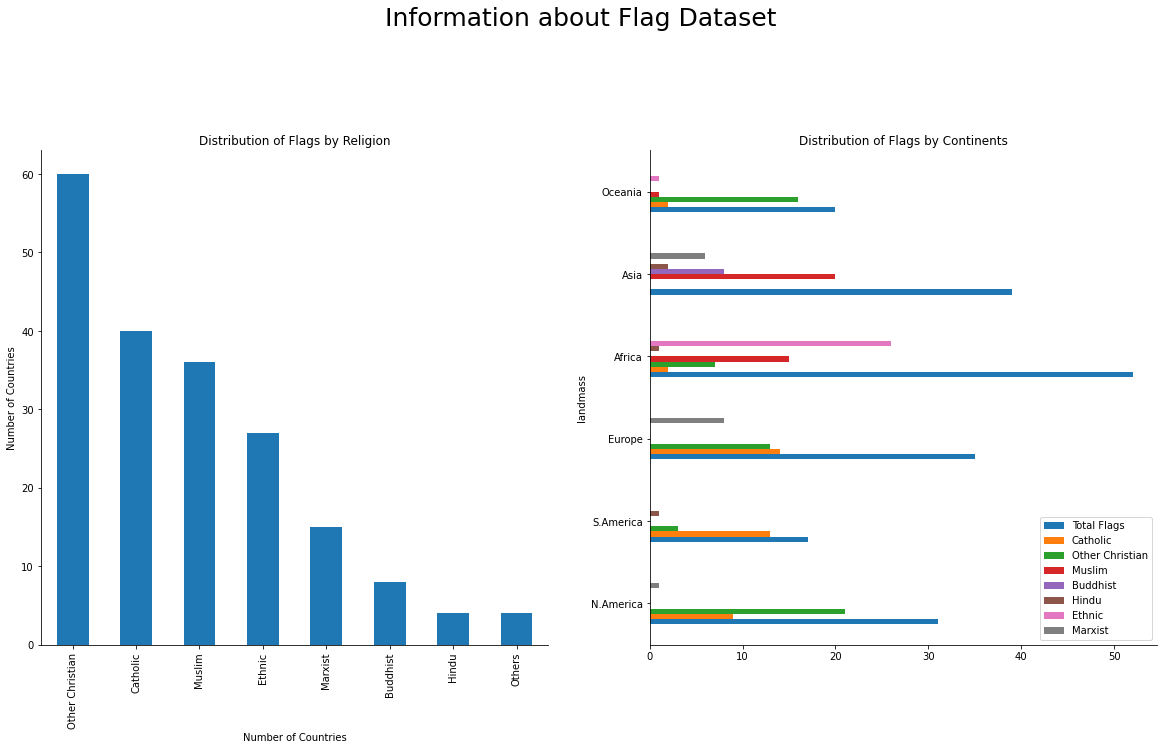

In [7]:
fig = plt.figure(figsize=(20,20))  
g = gs.GridSpec(2,2)
ax = plt.subplot(g[0,0])
ax2 = plt.subplot(g[0,1])

fig.suptitle("Information about Flag Dataset", size= 25)

ax2.set_title("Distribution of Flags by Continents")


country_flag.plot(kind="barh",ax=ax2 , legend=True)
ax2.legend(loc='upper left')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.legend(loc=4)
ax.set_xlabel("Number of Countries")

religions.plot(kind="bar", ax = ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel("Number of Countries")
ax.set_title("Distribution of Flags by Religion")

In [8]:
# showing the count of religion of country
print(flag['religion'].value_counts())


1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64


<AxesSubplot:>

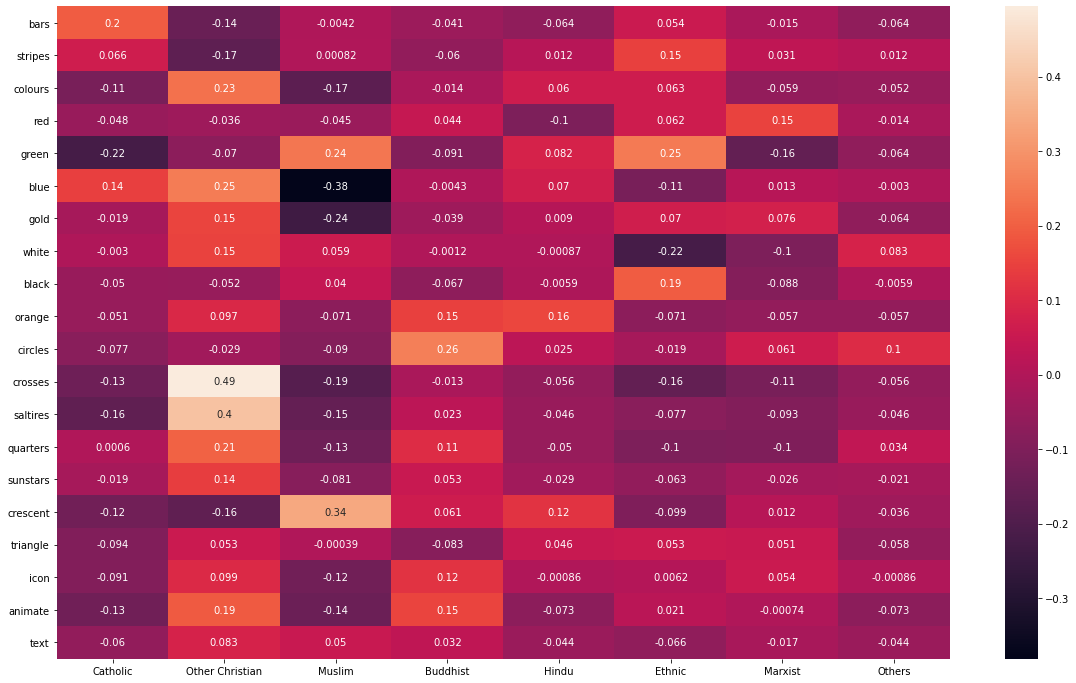

In [9]:
corr_flag = flag
corr_flag = corr_flag.reset_index()
extra_columns = pd.get_dummies(corr_flag["religion"])
extra_columns = extra_columns.reset_index()
extra_columns = extra_columns.rename(columns ={ 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"})
corr_flag = pd.merge(corr_flag,extra_columns,on="index",how="inner")

corr_flag = corr_flag.drop(["index","religion","landmass"], 1)
extra_columns = extra_columns.drop("index", 1)
Var_Corr = corr_flag.corr().filter(extra_columns).drop(extra_columns)

# plot the heatmap and annotation on it
fig = plt.figure(figsize=(20,12))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.index, annot=True)


In [10]:
flag["religion"] = flag['religion'].apply(lambda x : x if x < 4 or x == 5 else 7)

In [11]:
religion_dic = { 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"}
number_of_bars = flag
number_of_bars["religion"] = number_of_bars["religion"].map(religion_dic)
number_of_bars = number_of_bars.groupby(["religion","bars"])["landmass"].agg("count")


print(number_of_bars)

religion         bars
Buddhist         0        7
                 2        1
Catholic         0       27
                 1        1
                 2        3
                 3        9
Ethnic           0       20
                 1        2
                 2        1
                 3        4
Muslim           0       29
                 1        2
                 2        1
                 3        4
Other Christian  0       55
                 1        1
                 2        1
                 3        2
                 5        1
Others           0       21
                 3        2
Name: landmass, dtype: int64


In [12]:
flag_s_America = flag[["landmass","bars","religion"]]
flag_s_America = flag_s_America[flag_s_America["landmass"] == 2 ]

flag_s_America = flag_s_America.groupby(["religion","bars"])["landmass"].agg("count")

print(flag_s_America)

religion         bars
Catholic         0       11
                 3        2
Other Christian  0        3
Others           0        1
Name: landmass, dtype: int64


<AxesSubplot:>

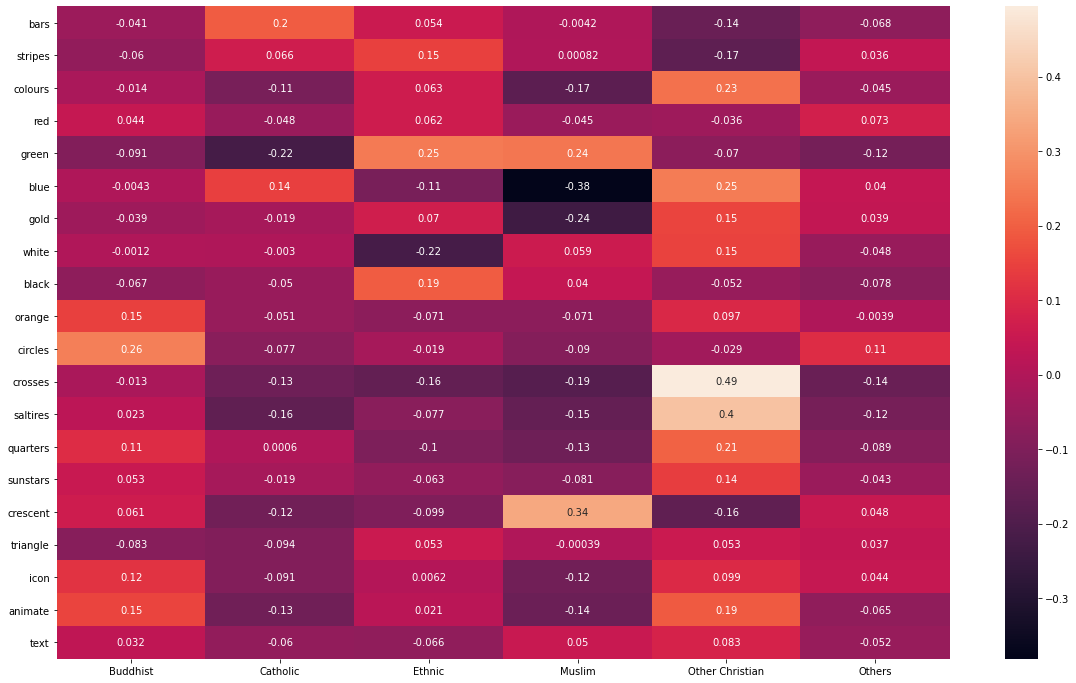

In [13]:
corr_flag = flag
corr_flag = corr_flag.reset_index()
extra_columns = pd.get_dummies(corr_flag["religion"])
extra_columns = extra_columns.reset_index()
extra_columns = extra_columns.rename(columns ={ 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"})
corr_flag = pd.merge(corr_flag,extra_columns,on="index",how="inner")

corr_flag = corr_flag.drop(["index","religion","landmass"], 1)
extra_columns = extra_columns.drop("index", 1)
Var_Corr = corr_flag.corr().filter(extra_columns).drop(extra_columns)

# plot the heatmap and annotation on it
fig = plt.figure(figsize=(20,12))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.index, annot=True)

In [14]:
# showing the number of flag that have certain feature
def visualize_feat(col):
    flag.hist(col, bins=50, figsize=(25, 15), color ='green')
    plt.xlabel('Number of ' + str(col))
    plt.ylabel('Number of country')
    plt.title('Number of flag that have certain number of ' + str(col))
    plt.show()

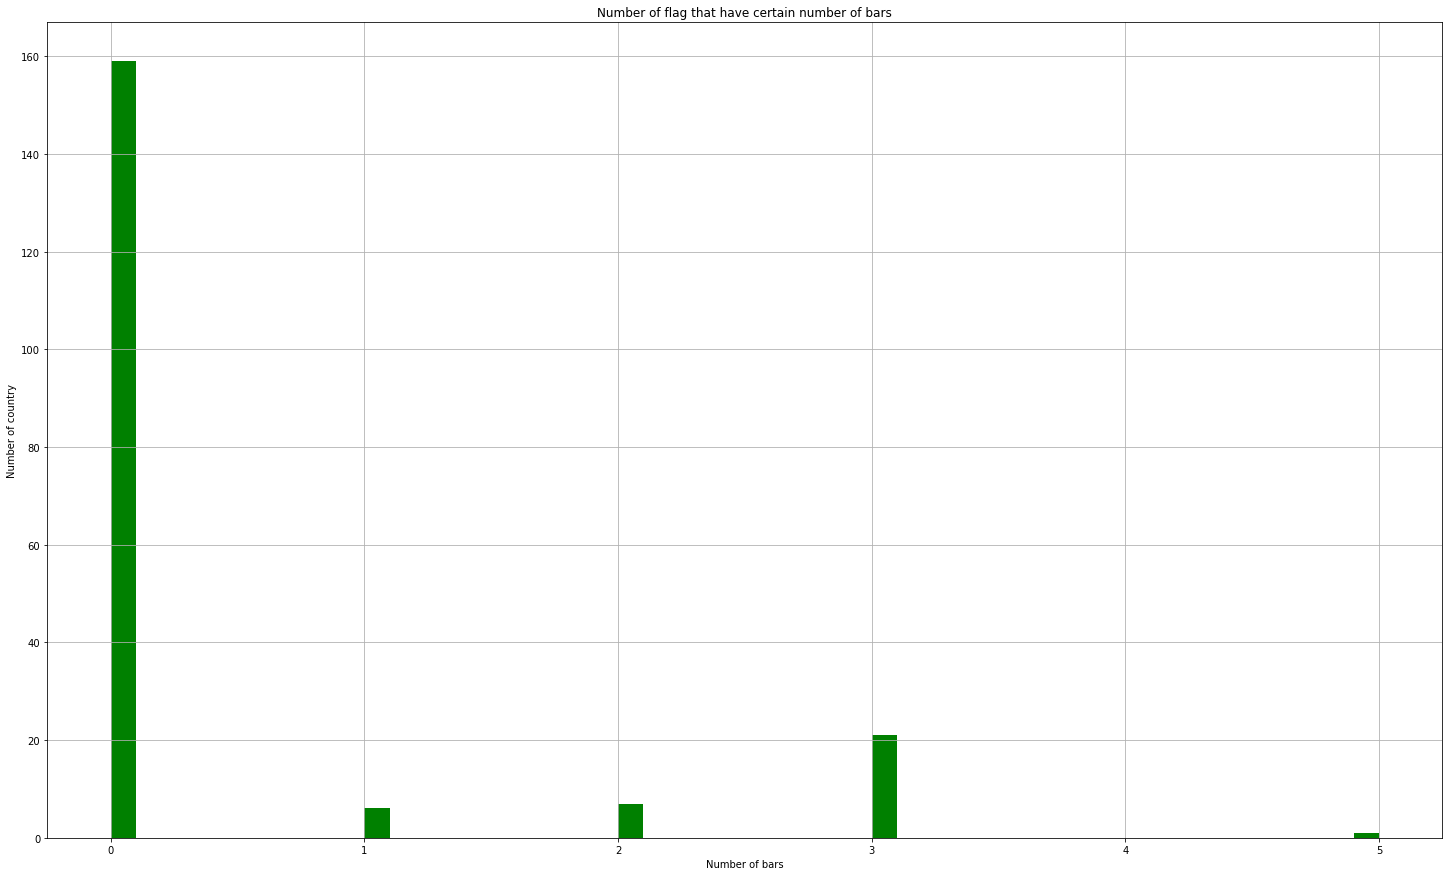

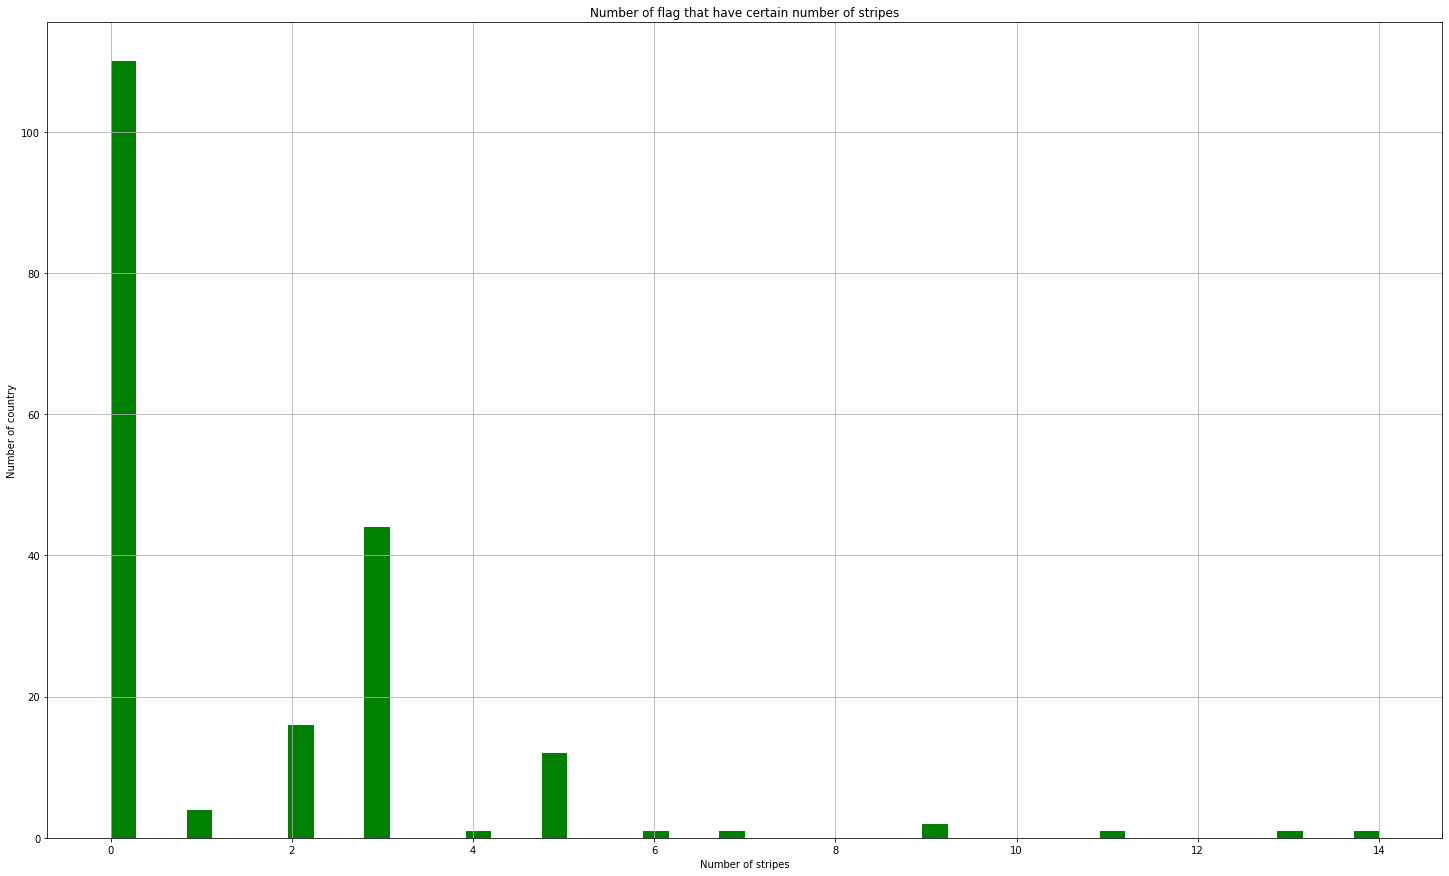

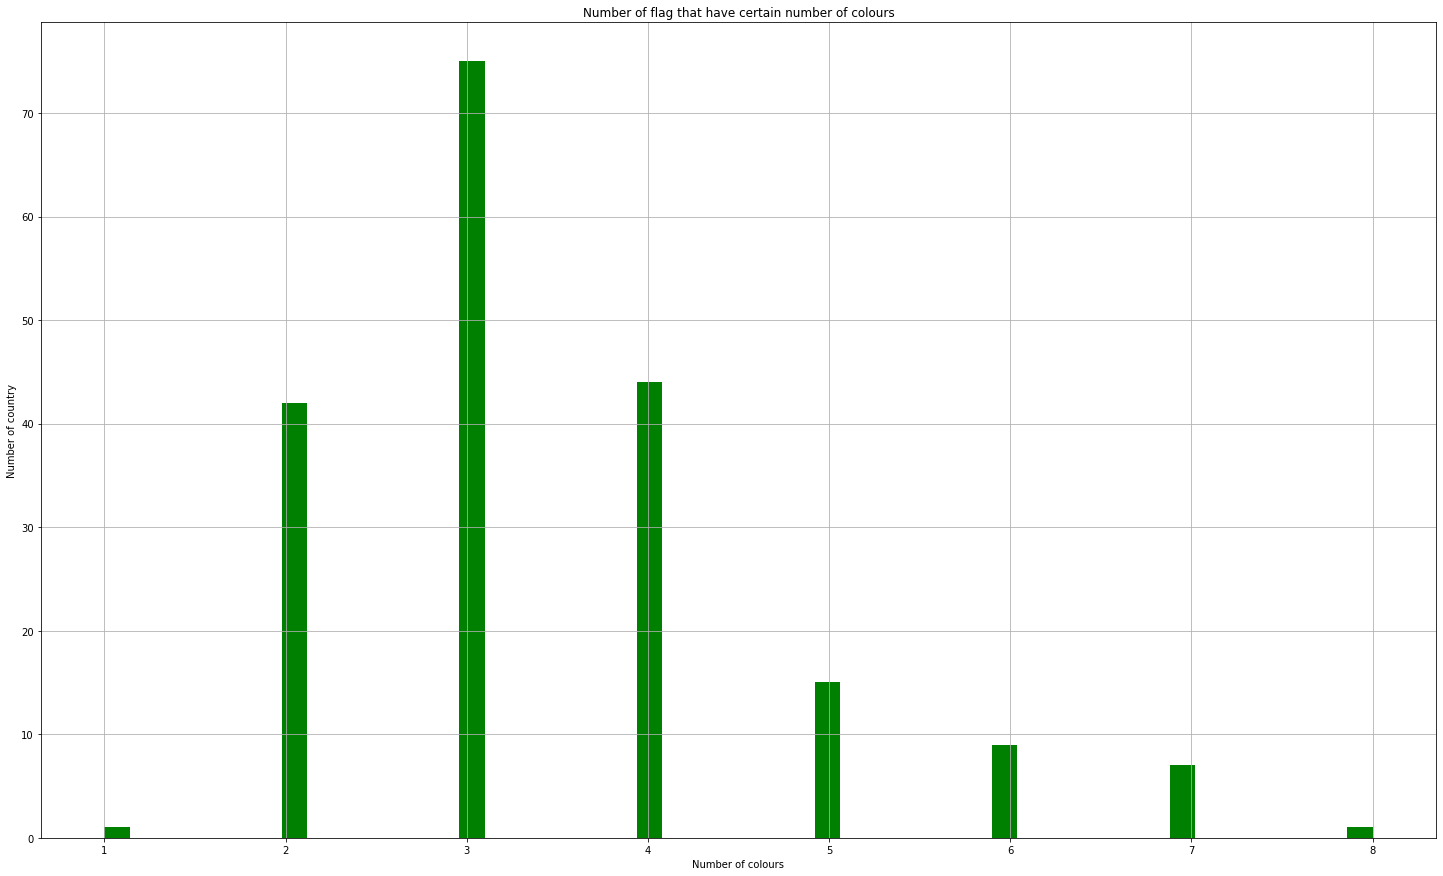

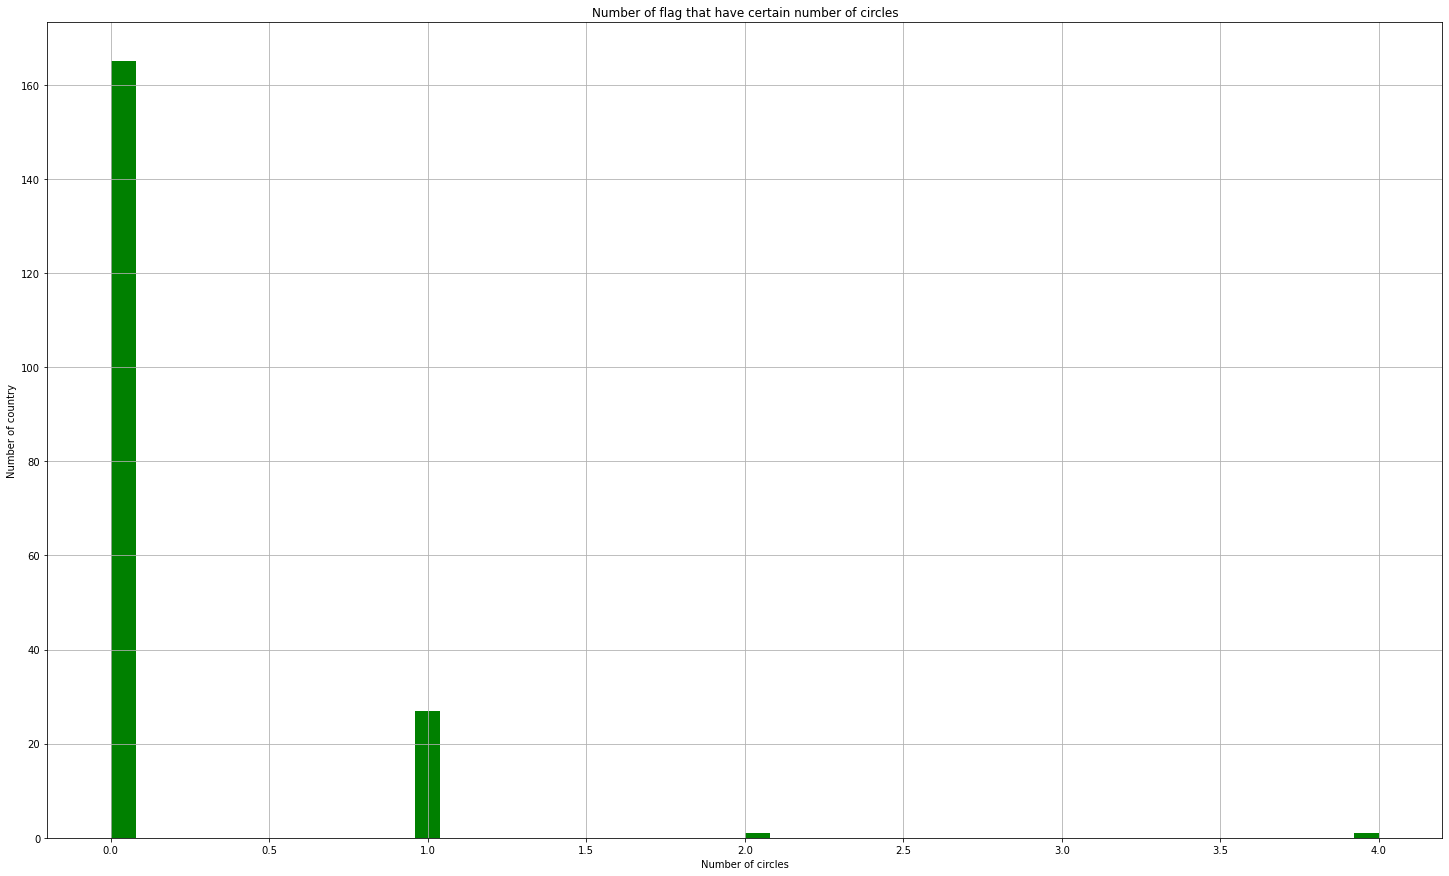

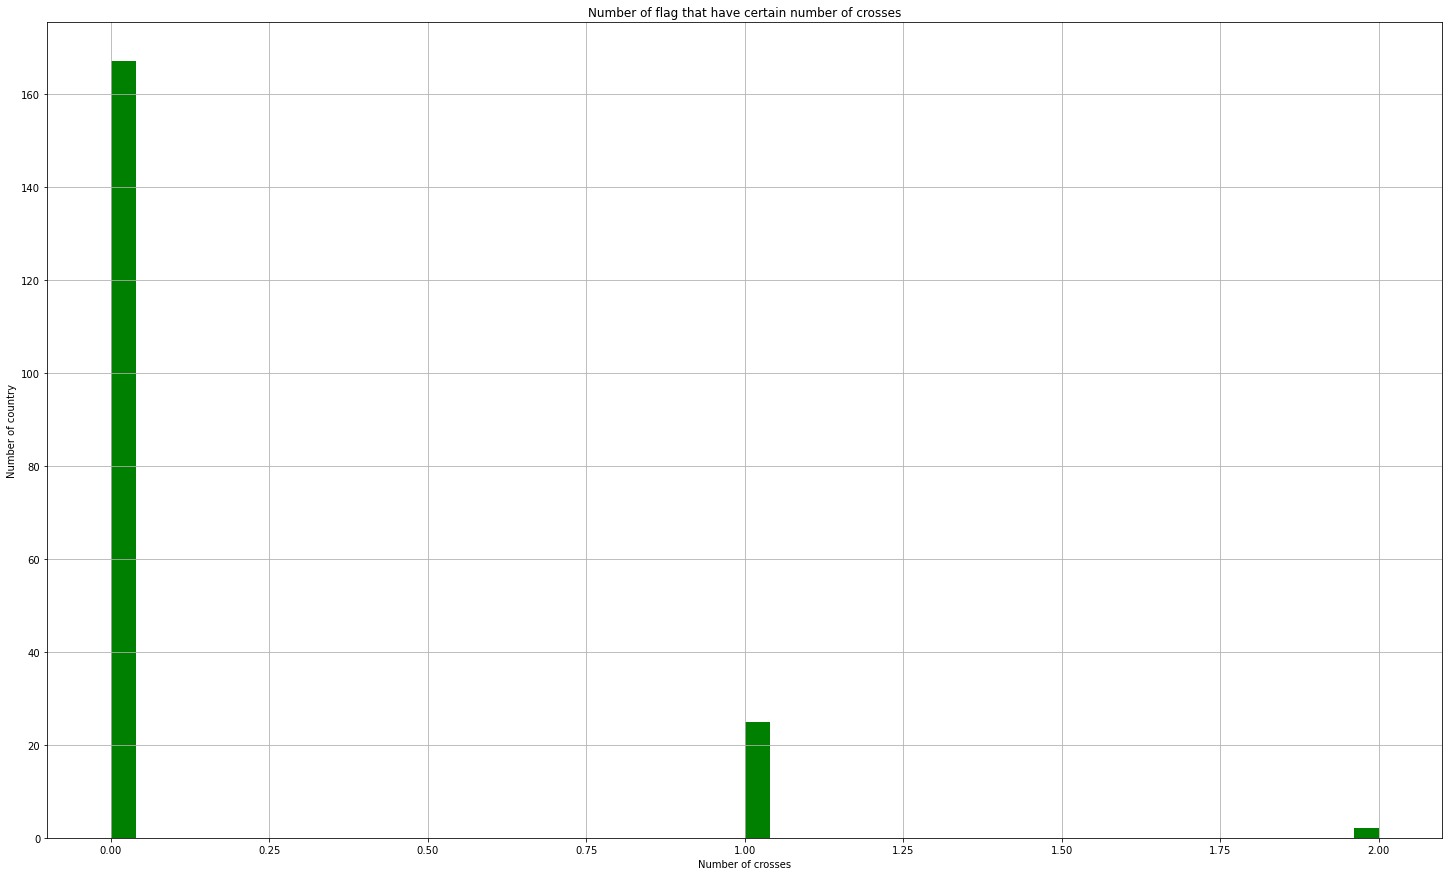

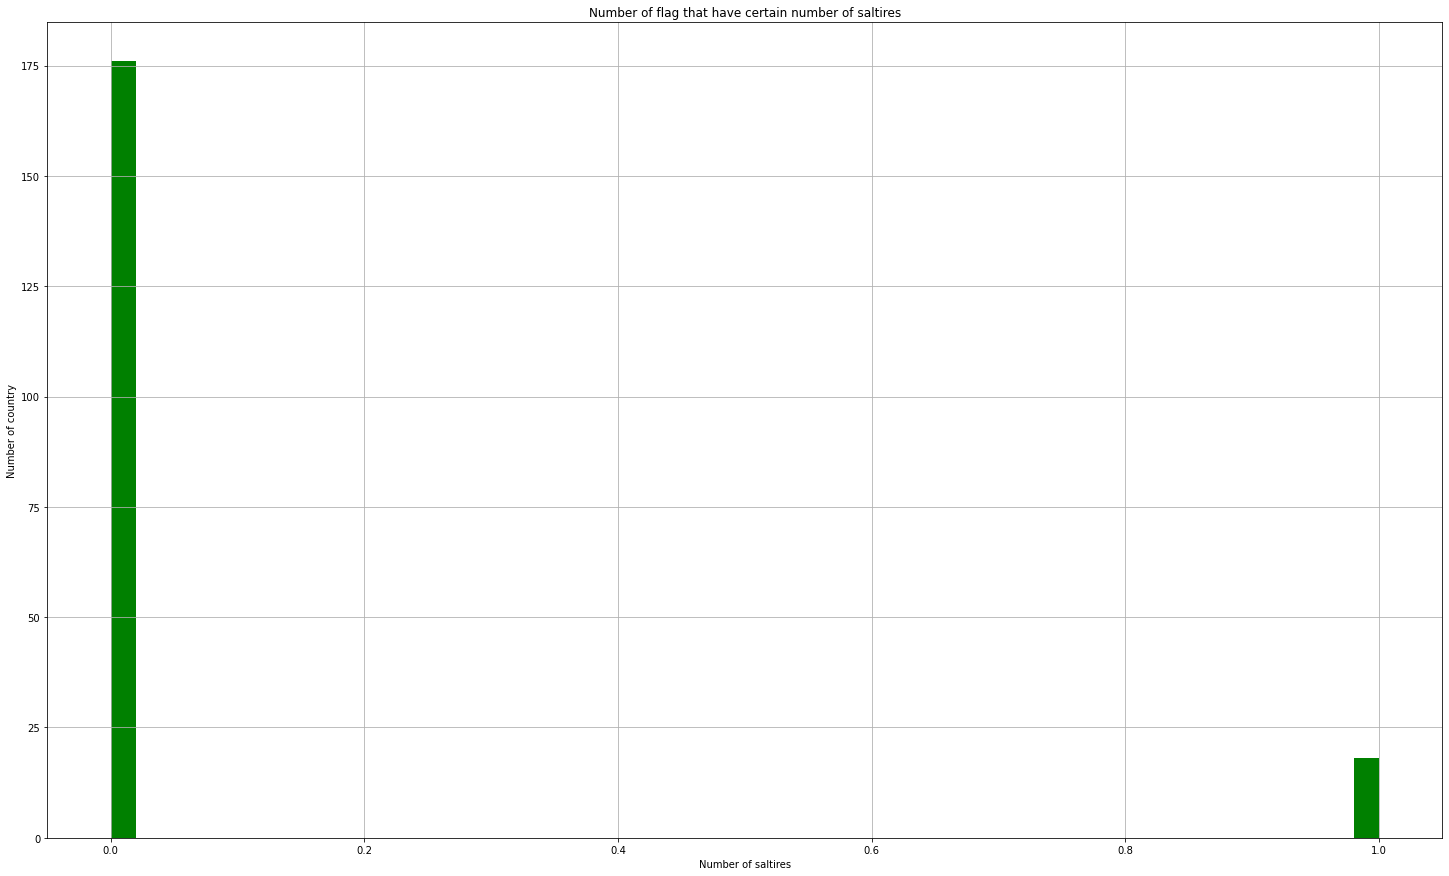

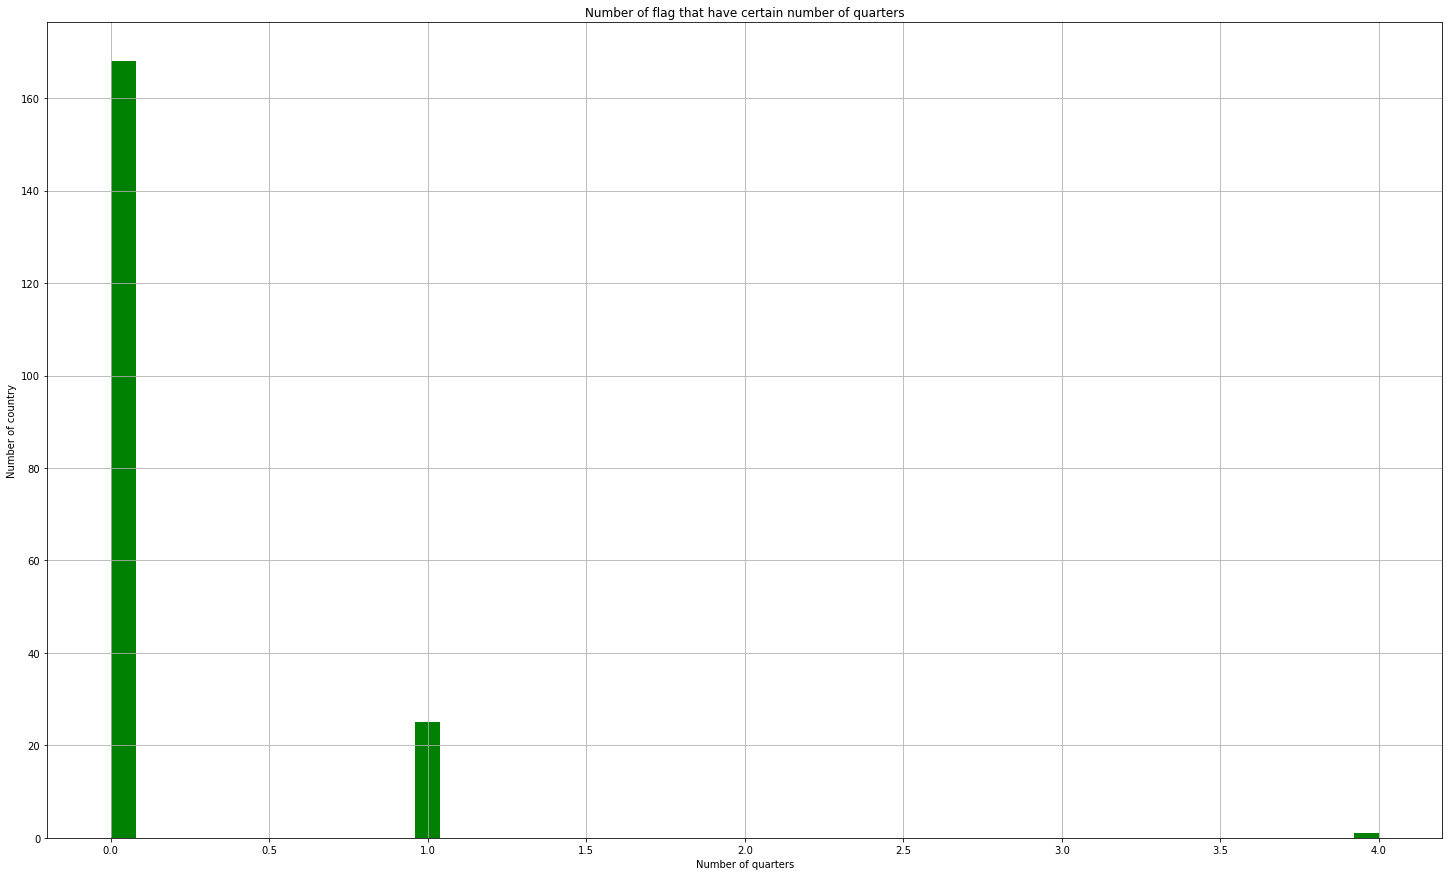

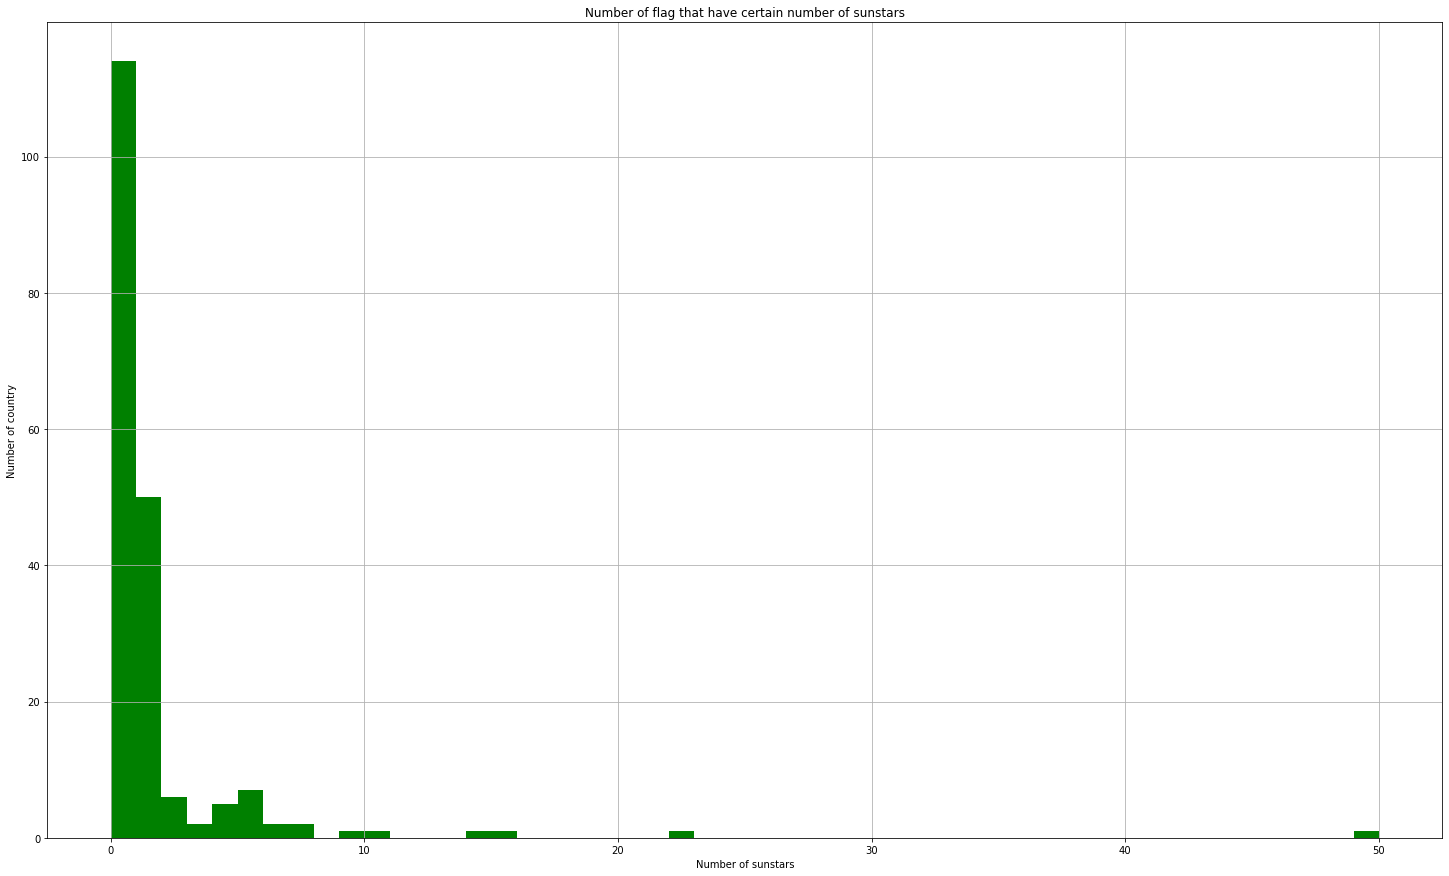

In [15]:
for x in ['bars', 'stripes', 'colours', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars']:
    visualize_feat(x)

In [16]:
# Showing number of flag that has certain colour
for x in ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange']:
    print("The number of flag that has " + x + " colour: " + str(flag[x].value_counts()[1]))

The number of flag that has red colour: 153
The number of flag that has green colour: 91
The number of flag that has blue colour: 99
The number of flag that has gold colour: 91
The number of flag that has white colour: 146
The number of flag that has black colour: 52
The number of flag that has orange colour: 26


In [17]:
# Showing number of flag that has certain feature
for x in ['crescent', 'triangle', 'icon', 'animate', 'text']:
    print("The number of flag that has " + x + ": " + str(flag[x].value_counts()[1]))

The number of flag that has crescent: 11
The number of flag that has triangle: 27
The number of flag that has icon: 49
The number of flag that has animate: 39
The number of flag that has text: 16


In [18]:
# preprocessing
# Seperate output vector from the input matrix
selected_cols = [
    'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
    'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate',
    'text'
]

In [19]:
X = pd.DataFrame(flag, columns=selected_cols)
y = flag['religion']
print('Shape of original dataset, train:', flag.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('Y: shape-', y.shape, 'type=', type(y))


Shape of original dataset, train: (194, 25)
X: shape= (194, 20) type= <class 'pandas.core.frame.DataFrame'>
Y: shape- (194,) type= <class 'pandas.core.series.Series'>


In [20]:
# Spliting data into testing and training set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train, X_test, y_train, y_test = X[:155], X[155:], y[:155], y[155:]

print('full set shape=', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)

full set shape= (194, 20)
train shape= (155, 20)
test shape= (39, 20)


In [21]:
# Check whether it has missing value in the dataset
print('Number of missing values for all columns:')
print(X_train.isnull().sum())


Number of missing values for all columns:
bars        0
stripes     0
colours     0
red         0
green       0
blue        0
gold        0
white       0
black       0
orange      0
circles     0
crosses     0
saltires    0
quarters    0
sunstars    0
crescent    0
triangle    0
icon        0
animate     0
text        0
dtype: int64


In [22]:
# Since there is no missing value, then we proceed to next step

# training and validation
from sklearn.linear_model import LogisticRegression

clf_lgr = LogisticRegression(random_state=42, multi_class='ovr')
clf_lgr.fit(X_train, y_train)
y_pred = clf_lgr.predict(X_train)

In [23]:
# clf_lgr.predict_proba(X_train)
score = clf_lgr.score(X_train, y_train)
print('Logistic Regression score: ', score)

Logistic Regression score:  0.5741935483870968


In [24]:
from sklearn.model_selection import cross_validate

In [25]:
lgr_result = cross_validate (clf_lgr, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('LogisticRegression: validation accuracy = {:.4f}'.format(lgr_result['test_accuracy'].mean()))
print('LogisticRegression: validation recall = {:.4f}'.format(lgr_result['test_recall_micro'].mean()))
print('LogisticRegression: validation precision = {:.4f}'.format(lgr_result['test_precision_micro'].mean()))
print('LogisticRegression: validation f1 = {:.4f}'.format(lgr_result['test_f1_micro'].mean()))


LogisticRegression: validation accuracy = 0.3873
LogisticRegression: validation recall = 0.3873
LogisticRegression: validation precision = 0.3873
LogisticRegression: validation f1 = 0.3873


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_train)
score = dtree_model.score(X_train, y_train)
print("Decision Tree Classifier", score)

Decision Tree Classifier 0.43870967741935485


In [28]:
dtree_result = cross_validate (dtree_model, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('DecisionTreeClassifier: validation accuracy = {:.4f}'.format(dtree_result['test_accuracy'].mean()))
print('DecisionTreeClassifier: validation recall = {:.4f}'.format(dtree_result['test_recall_micro'].mean()))
print('DecisionTreeClassifier: validation precision = {:.4f}'.format(dtree_result['test_precision_micro'].mean()))
print('DecisionTreeClassifier: validation f1 = {:.4f}'.format(dtree_result['test_f1_micro'].mean()))


DecisionTreeClassifier: validation accuracy = 0.3611
DecisionTreeClassifier: validation recall = 0.3611
DecisionTreeClassifier: validation precision = 0.3611
DecisionTreeClassifier: validation f1 = 0.3611


In [43]:
# Decision Tree with different max depth (8)
dtree_model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_train)
score = dtree_model.score(X_train, y_train)
print("Decision Tree Classifier", score)

dtree_result = cross_validate (dtree_model, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('DecisionTreeClassifier: validation accuracy = {:.4f}'.format(dtree_result['test_accuracy'].mean()))
print('DecisionTreeClassifier: validation recall = {:.4f}'.format(dtree_result['test_recall_micro'].mean()))
print('DecisionTreeClassifier: validation precision = {:.4f}'.format(dtree_result['test_precision_micro'].mean()))
print('DecisionTreeClassifier: validation f1 = {:.4f}'.format(dtree_result['test_f1_micro'].mean()))


Decision Tree Classifier 0.7806451612903226
DecisionTreeClassifier: validation accuracy = 0.3612
DecisionTreeClassifier: validation recall = 0.3612
DecisionTreeClassifier: validation precision = 0.3612
DecisionTreeClassifier: validation f1 = 0.3612


In [30]:
# Decision Tree with different max depth (5)
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_train)
score = dtree_model.score(X_train, y_train)
print("Decision Tree Classifier", score)

dtree_result = cross_validate (dtree_model, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('DecisionTreeClassifier: validation accuracy = {:.4f}'.format(dtree_result['test_accuracy'].mean()))
print('DecisionTreeClassifier: validation recall = {:.4f}'.format(dtree_result['test_recall_micro'].mean()))
print('DecisionTreeClassifier: validation precision = {:.4f}'.format(dtree_result['test_precision_micro'].mean()))
print('DecisionTreeClassifier: validation f1 = {:.4f}'.format(dtree_result['test_f1_micro'].mean()))


Decision Tree Classifier 0.6
DecisionTreeClassifier: validation accuracy = 0.3743
DecisionTreeClassifier: validation recall = 0.3743
DecisionTreeClassifier: validation precision = 0.3743
DecisionTreeClassifier: validation f1 = 0.3743


In [31]:
# training a linear SVM classifier
from sklearn.svm import SVC

In [32]:
svm_model = SVC(C = 2).fit(X_train, y_train)
svm_predictions = svm_model.predict(X_train)
score = svm_model.score(X_train, y_train)
print("SVM classifier", score)

SVM classifier 0.6129032258064516


In [33]:
svm_result = cross_validate (svm_model, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('SVM classifier: validation accuracy = {:.4f}'.format(svm_result['test_accuracy'].mean()))
print('SVM classifier: validation recall = {:.4f}'.format(svm_result['test_recall_micro'].mean()))
print('SVM classifier: validation precision = {:.4f}'.format(svm_result['test_precision_micro'].mean()))
print('SVM classifier: validation f1 = {:.4f}'.format(svm_result['test_f1_micro'].mean()))

SVM classifier: validation accuracy = 0.4066
SVM classifier: validation recall = 0.4066
SVM classifier: validation precision = 0.4066
SVM classifier: validation f1 = 0.4066


In [34]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_train)
score = knn.score(X_train, y_train)
print("KNN classifier", score)

KNN classifier 0.5870967741935483


In [36]:
knn_result = cross_validate (knn, X_train, y_train, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
print('KNN classifier: validation accuracy = {:.4f}'.format(knn_result['test_accuracy'].mean()))
print('KNN classifier: validation recall = {:.4f}'.format(knn_result['test_recall_micro'].mean()))
print('KNN classifier: validation precision = {:.4f}'.format(knn_result['test_precision_micro'].mean()))
print('KNN classifier: validation f1 = {:.4f}'.format(knn_result['test_f1_micro'].mean()))

KNN classifier: validation accuracy = 0.3934
KNN classifier: validation recall = 0.3934
KNN classifier: validation precision = 0.3934
KNN classifier: validation f1 = 0.3934


In [37]:
# tuning and testing

# Grid search on SVM Classifier
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C': [1, 2, 3], 'kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'], refit='accuracy')

print ('Performing grid search...', end = '')
grid_search.fit(X_train, y_train)
print('done')

best_model_svc = grid_search.best_estimator_
print(best_model_svc)

print('Best hyperparameter settings:', grid_search.best_params_)
print('Scoring of the best model =', grid_search.best_score_)

Performing grid search...done
SVC(C=2)
Best hyperparameter settings: {'C': 2, 'kernel': 'rbf'}
Scoring of the best model = 0.4066113624937155


In [39]:
# Grid Search on KNN Regression
param_grid = {'n_neighbors': [3, 4, 5, 6, 7], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(knn, param_grid, cv=3, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'], refit='accuracy')

print ('Performing grid search...', end = '')
grid_search.fit(X_train, y_train)
print('done')

best_model_knn = grid_search.best_estimator_
print(best_model_knn)

print('Best hyperparameter settings:', grid_search.best_params_)
print('Scoring of the best model =', grid_search.best_score_)



Performing grid search...done
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=4)
Best hyperparameter settings: {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 4}
Scoring of the best model = 0.4707139265962796


In [40]:
# Testing on testing set
best_model = best_model_knn
y_pred = best_model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall', recall)
print('F1 score:', f1)

Accuracy: 0.5384615384615384
Precision: 0.5384615384615384
Recall 0.5384615384615384
F1 score: 0.5384615384615384
